In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,8
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
term_horizon = 'long' # short , mid , long
datasets = 'GGRM' # GGRM , UNVR, PSDN
parameter_lstm = "e=100_u=50"
parameter_arima = "p=1_q=1"
metode_str = 'LSTM' # ARIMA, LSTM

data_ggrm = pd.read_csv('../results/LSTM/datasets/' + term_horizon+ '/'+ 'GGRM' + '.jk_LSTM-' + term_horizon 
                        + '_'+ parameter_lstm +'.csv')
data_unvr = pd.read_csv('../results/LSTM/datasets/' + term_horizon+ '/'+ 'UNVR' + '.jk_LSTM-' + term_horizon 
                        + '_'+ parameter_lstm +'.csv')
data_psdn = pd.read_csv('../results/LSTM/datasets/' + term_horizon+ '/'+ 'PSDN' + '.jk_LSTM-' + term_horizon 
                        + '_'+ parameter_lstm +'.csv')

In [4]:
ggrm_close = data_ggrm['close_lstm']
unvr_close = data_unvr['close_lstm']
psdn_close = data_psdn['close_lstm']
real_close = data_ggrm['real_close']


date_time = data_ggrm['Date']
date_time = pd.to_datetime(date_time)

new_df = pd.DataFrame()
new_df['ggrm_close'] = ggrm_close
new_df['unvr_close'] = unvr_close
new_df['psdn_close'] = psdn_close
new_df['real_close'] = real_close

new_df = new_df.set_index(date_time)

In [5]:
new_df

,ggrm_close,unvr_close,psdn_close,real_close
Date,,,,
2020-12-22,41855.297,7680.3965,116.20825,41325.0
2020-12-23,41603.797,7589.7270,123.76964,41075.0
2020-12-28,41262.620,7498.8286,119.14855,41025.0
2020-12-29,41234.203,7515.5560,124.62738,41075.0
2020-12-30,41409.113,7466.6313,125.91619,41000.0
...,...,...,...,...
2021-12-24,31272.922,4635.9830,152.57779,30525.0
2021-12-27,31192.209,4684.6196,147.53308,30675.0
2021-12-28,31277.422,4727.5967,165.68951,30650.0


<Figure size 1800x576 with 0 Axes>

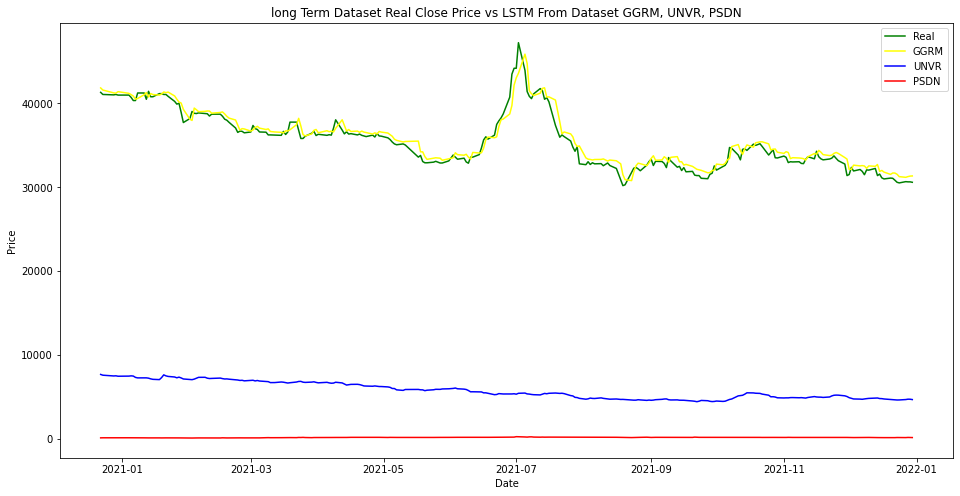

In [6]:
plt.figure()
plt.subplots(figsize=(16, 8))
plt.plot(new_df['real_close'], color = 'green', label = 'Real')

plt.plot(new_df['ggrm_close'], color = 'yellow', label = 'GGRM')
plt.plot(new_df['unvr_close'], color = 'blue', label = 'UNVR')
plt.plot(new_df['psdn_close'], color = 'red', label = 'PSDN')
plt.title(term_horizon+" Term Dataset Real Close Price vs LSTM From Dataset GGRM, UNVR, PSDN")
plt.xlabel('Date')
plt.ylabel("Price")
plt.savefig("../results/LSTM - GGRM, UNVR, PSDN Long Term " + '.pdf')
plt.legend()
plt.show()